<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/share_mh_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# share_mh_ff

In [ ]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [ ]:
# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')

# print column values
print(cd['share_mh_ff'].value_counts())
print('\n')

# print year values
print(cd['year'].value_counts())
print('\n')

# visualize data
cd

Somewhat open                                            1255
Very open                                                 640
Somewhat not open                                         459
Neutral                                                   329
Not open at all                                           163
Not applicable to me (I do not have a mental illness)     112
Name: share_mh_ff, dtype: int64


2016    1433
2017     756
2018     417
2019     352
Name: year, dtype: int64




,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,No,Yes,No,NaN,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,Yes,Yes,Yes,NaN,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Somewhat open,Maybe/Not sure,NaN,No,Maybe,No,NaN,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,"Yes, I experienced",NaN,Yes,Yes,Yes,NaN,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,NaN,NaN,NaN,Maybe,No,Very open,"Yes, I observed",Maybe,No,No,Maybe,NaN,False,27.0,male,India,NaN,India,NaN,2019,male
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Yes,26-50%,Maybe,Maybe,Somewhat not open,"Yes, I observed",NaN,No,No,No,NaN,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Unsure,NaN,Yes,No,Very open,I've always been self-employed,NaN,No,No,No,NaN,False,50.0,M,India,NaN,India,NaN,2019,male
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,NaN,NaN,NaN,No,No,Somewhat not open,Maybe/Not sure,Yes,No,No,Maybe,NaN,False,30.0,female,India,NaN,India,NaN,2019,female


## Notes


* % of `Yes` responses increases...
  * year-to-year, except for the last year
  * with age
  * with company size

* Those with `mh_benefits` find it more difficult to leave work than those without

* Those w/o `mh_benefits` are slightly more like to **not** discuss mh w/ their coworkers or supervisors

* Status of `mh_benefits` doesn't seem to impact `share_mh_ff`




## Basic Demographics

### Diagnoses by State

mh_diagnosed          No  Yes  sum
state_live                        
Alabama                0    3    3
Alaska                 0    1    1
Arizona                0    3    3
California             1   49   50
Colorado               0   11   11
Connecticut            0    1    1
District of Columbia   0    3    3
Florida                0    6    6
Georgia                0   10   10
Idaho                  0    1    1
Illinois               0   69   69
Indiana                1   17   18
Iowa                   0    5    5
Kansas                 0    4    4
Kentucky               0    4    4
Louisiana              1    1    2
Maine                  0    1    1
Maryland               0   12   12
Massachusetts          0   18   18
Michigan               0   22   22
Minnesota              1   24   25
Missouri               1    6    7
Nebraska               1   16   17
Nevada                 0    1    1
New Hampshire          0    6    6
New Jersey             0    7    7
New Mexico          

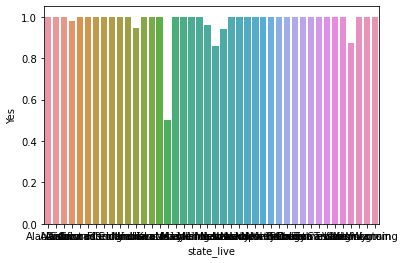

In [ ]:
dbs_cd = cd[pd.notna(cd["mh_diagnosed"])][["state_live", "mh_diagnosed", "year"]]

state_diagnoses = pd.pivot_table(dbs_cd, values="year", columns="mh_diagnosed", index="state_live", fill_value=0, aggfunc="count")
state_diagnoses["sum"] = state_diagnoses.sum(axis=1)
print(state_diagnoses, '\n\n')

age_range_comparison = state_diagnoses.loc[:,"No":"Yes"].div(state_diagnoses["sum"], axis=0)
print(age_range_comparison)
 
x = sns.barplot(x=age_range_comparison.index, y="Yes", data=age_range_comparison)
x

### Willingness to share by state

share_mh_ff           Neutral  Not open at all  ...  Very open  sum
state_live                                      ...                
Alabama                     1                0  ...          3   10
Alaska                      0                1  ...          0    4
Arizona                     1                0  ...          3   11
California                 22               17  ...         47  230
Colorado                    5                4  ...          8   50
Connecticut                 0                0  ...          1    8
Delaware                    0                0  ...          0    1
District of Columbia        0                0  ...          0    7
Florida                     2                3  ...          6   37
Georgia                     5                2  ...          8   35
Idaho                       0                0  ...          2    7
Illinois                   22                7  ...         53  189
Indiana                    13                2  

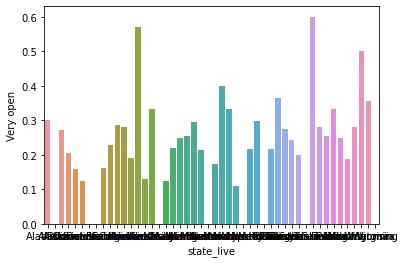

In [ ]:
wbs_cd = cd[pd.notna(cd["share_mh_ff"])][["state_live", "share_mh_ff", "year"]]

wbs_cd = wbs_cd[wbs_cd["share_mh_ff"] != 'Not applicable to me (I do not have a mental illness)']

state_willingness = pd.pivot_table(wbs_cd, values="year", columns="share_mh_ff", index="state_live", fill_value=0, aggfunc="count")
state_willingness["sum"] = state_willingness.sum(axis=1)
print(state_willingness)

state_willingness_comparison = state_willingness.loc[:,"Neutral":"Very open"].div(state_willingness["sum"], axis=0)
print(state_willingness_comparison)

sortedStates = state_willingness_comparison["Very open"].sort_values(ascending=False)

print(sortedStates)
 
x = sns.barplot(x=state_willingness_comparison.index, y="Very open", data=state_willingness_comparison)


### Gender

        gender  not_open%  somewhat_not%  ...  somewhat%     open%       na%
0         male   0.057254       0.157205  ...   0.424066  0.210577  0.040272
1       female   0.048101       0.153165  ...   0.439241  0.217722  0.034177
2  transgender   0.142857       0.285714  ...   0.214286  0.285714  0.000000
3        other   0.032787       0.081967  ...   0.344262  0.344262  0.032787

[4 rows x 7 columns]


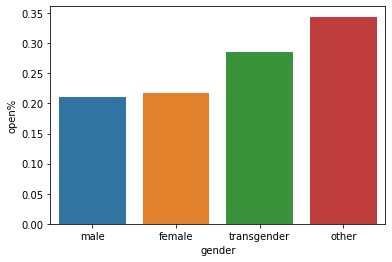

In [ ]:
male_df = cd[cd['gender_cleaned'] == 'male']
num_of_male = len(male_df)
num_of_not_open_male = len(male_df[male_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_male = len(male_df[male_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_male = len(male_df[male_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_male = len(male_df[male_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_male = len(male_df[male_df['share_mh_ff'] == 'Very open'])
num_of_na_male = len(male_df[male_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_male = ['male', (num_of_not_open_male/num_of_male), (num_of_somewhat_not_open_male/num_of_male), (num_of_neutral_male/num_of_male), (num_of_somewhat_open_male/num_of_male), (num_of_open_male/num_of_male), (num_of_na_male/num_of_male)]

female_df = cd[cd['gender_cleaned'] == 'female']
num_of_female = len(female_df)
num_of_not_open_female = len(female_df[female_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_female = len(female_df[female_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_female = len(female_df[female_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_female = len(female_df[female_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_female = len(female_df[female_df['share_mh_ff'] == 'Very open'])
num_of_na_female = len(female_df[female_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_female = ['female', (num_of_not_open_female/num_of_female), (num_of_somewhat_not_open_female/num_of_female), (num_of_neutral_female/num_of_female), (num_of_somewhat_open_female/num_of_female), (num_of_open_female/num_of_female), (num_of_na_female/num_of_female)]

transgender_df = cd[cd['gender_cleaned'] == 'transgender']
num_of_transgender = len(transgender_df)
num_of_not_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Very open'])
num_of_na_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_transgender = ['transgender', (num_of_not_open_transgender/num_of_transgender), (num_of_somewhat_not_open_transgender/num_of_transgender), (num_of_neutral_transgender/num_of_transgender), (num_of_somewhat_open_transgender/num_of_transgender), (num_of_open_transgender/num_of_transgender), (num_of_na_transgender/num_of_transgender)]

other_df = cd[cd['gender_cleaned'] == 'other']
num_of_other = len(other_df)
num_of_not_open_other = len(other_df[other_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_other = len(other_df[other_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_other = len(other_df[other_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_other = len(other_df[other_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_other = len(other_df[other_df['share_mh_ff'] == 'Very open'])
num_of_na_other = len(other_df[other_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_other = ['other', (num_of_not_open_other/num_of_other), (num_of_somewhat_not_open_other/num_of_other), (num_of_neutral_other/num_of_other), (num_of_somewhat_open_other/num_of_other), (num_of_open_other/num_of_other), (num_of_na_other/num_of_other)]


lst = [row_male, row_female, row_transgender, row_other]
    
gender_comparison = pd.DataFrame(lst, columns =['gender', 'not_open%', 'somewhat_not%', 'neutral%', 'somewhat%', 'open%', 'na%'], dtype = float)
print(gender_comparison)

open_plot = sns.barplot(x="gender", y="open%", data=gender_comparison)
#somewhat_plot = sns.barplot(x="gender", y="somewhat%", data=gender_comparison)
#neutral_plot = sns.barplot(x="gender", y="neutral%", data=gender_comparison)
#somewhat_not_plot = sns.barplot(x="gender", y="somewhat_not%", data=gender_comparison)
#not_open_plot = sns.barplot(x="gender", y="not_open%", data=gender_comparison)

#males and females are less likley to be open to telling their families than transgender and other, with other being the most likely



### Age

share_mh_ff  Neutral  ...     sum
age_range             ...        
(0, 20]          7.0  ...    27.0
(20, 30]       107.0  ...  1028.0
(30, 40]       147.0  ...  1280.0
(40, 50]        49.0  ...   480.0
(50, 60]        14.0  ...   114.0
(60, 100]        4.0  ...    25.0

[6 rows x 7 columns] 


share_mh_ff   Neutral  ...  Very open
age_range              ...           
(0, 20]      0.259259  ...   0.111111
(20, 30]     0.104086  ...   0.213035
(30, 40]     0.114844  ...   0.225000
(40, 50]     0.102083  ...   0.208333
(50, 60]     0.122807  ...   0.210526
(60, 100]    0.160000  ...   0.240000

[6 rows x 6 columns]


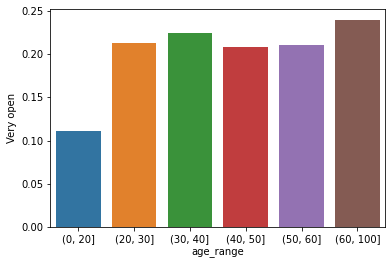

In [ ]:
cd['age_range'] = pd.cut(cd['age'], [0, 20, 30, 40, 50, 60, 100])
age_range_pt = cd.pivot_table('age', index='age_range', columns='share_mh_ff', aggfunc='count')
age_range_pt["sum"] = age_range_pt.sum(axis=1)
print(age_range_pt, '\n\n')

age_range_comparison = age_range_pt.loc[:,"Neutral":"Very open"].div(age_range_pt["sum"], axis=0)
print(age_range_comparison)

x = sns.barplot(x=age_range_comparison.index, y="Very open", data=age_range_comparison)
x
#There seems to be no coorelation between age and willingness to share mental health issues with family/friends

## Other Values

### Company Size

share_mh_ff     Neutral  ...  sum
company_size             ...     
1-5                  10  ...   92
100-500              66  ...  612
26-100               59  ...  535
500-1000             23  ...  186
6-25                 48  ...  399
More than 1000       70  ...  630

[6 rows x 7 columns] 


share_mh_ff     Not open at all  Somewhat not open  Somewhat open  Very open
company_size                                                                
1-5                    0.065217           0.173913       0.358696   0.239130
100-500                0.053922           0.127451       0.436275   0.243464
26-100                 0.052336           0.151402       0.435514   0.218692
500-1000               0.037634           0.123656       0.446237   0.231183
6-25                   0.072682           0.162907       0.411028   0.187970
More than 1000         0.057143           0.182540       0.414286   0.209524


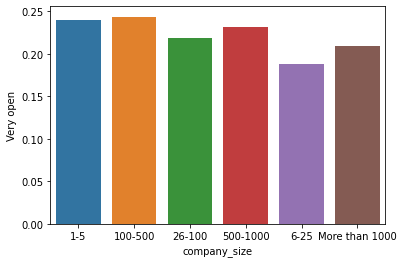

In [ ]:
company_size_pt = cd.pivot_table('age', index='company_size', columns='share_mh_ff', aggfunc='count')
company_size_pt["sum"] = company_size_pt.sum(axis=1)
print(company_size_pt, '\n\n')

company_size_comparison = company_size_pt.loc[:,"Not open at all":"Very open"].div(company_size_pt["sum"], axis=0)
print(company_size_comparison)

x = sns.barplot(x=company_size_comparison.index, y="Very open", data=company_size_comparison)
x

### Leaving Difficulty

share_mh_ff                 Neutral  Not open at all  ...  Very open  sum
leaving_difficulty                                    ...                
Difficult                        14               14  ...         22  112
I don't know                     33               14  ...         56  229
Neither easy nor difficult       30                6  ...         34  166
Somewhat difficult               19               10  ...         34  159
Somewhat easy                    31               18  ...         91  356
Very easy                        38               13  ...        103  286

[6 rows x 6 columns] 


share_mh_ff                 Not open at all  ...  Very open
leaving_difficulty                           ...           
Difficult                          0.125000  ...   0.196429
I don't know                       0.061135  ...   0.244541
Neither easy nor difficult         0.036145  ...   0.204819
Somewhat difficult                 0.062893  ...   0.213836
Somewhat easy          

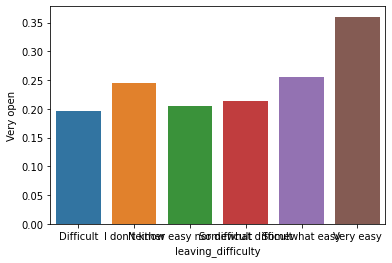

In [ ]:

leaving_difficulty_pt = cd.pivot_table('age', index='leaving_difficulty', columns='share_mh_ff', aggfunc='count')
leaving_difficulty_pt["sum"] = leaving_difficulty_pt.sum(axis=1)
print(leaving_difficulty_pt, '\n\n')

leaving_difficulty_comparison = leaving_difficulty_pt.loc[:,"Not open at all":"Very open"].div(leaving_difficulty_pt["sum"], axis=0)
print(leaving_difficulty_comparison)

x = sns.barplot(x=leaving_difficulty_comparison.index, y="Very open", data=leaving_difficulty_comparison)
x

### Discuss MH w/ Coworkers

share_mh_ff       Neutral  Not open at all  ...  Very open  sum
disc_mh_coworker                            ...                
Maybe                  84               16  ...        129  574
No                     44               51  ...         38  327
Yes                    37                8  ...        173  407

[3 rows x 6 columns] 


share_mh_ff       Not open at all  Somewhat not open  Somewhat open  Very open
disc_mh_coworker                                                              
Maybe                    0.027875           0.163763       0.437282   0.224739
No                       0.155963           0.256881       0.336391   0.116208
Yes                      0.019656           0.056511       0.407862   0.425061


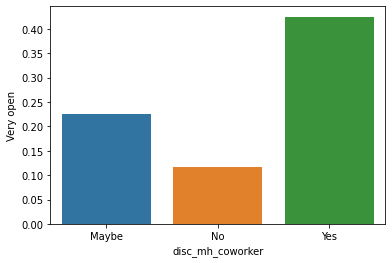

In [ ]:
disc_mh_coworker_pt = cd.pivot_table('age', index='disc_mh_coworker', columns='share_mh_ff', aggfunc='count')
disc_mh_coworker_pt["sum"] = disc_mh_coworker_pt.sum(axis=1)
print(disc_mh_coworker_pt, '\n\n')

disc_mh_coworker_comparison = disc_mh_coworker_pt.loc[:,"Not open at all":"Very open"].div(disc_mh_coworker_pt["sum"], axis=0)
print(disc_mh_coworker_comparison)

x = sns.barplot(x=disc_mh_coworker_comparison.index, y="Very open", data=disc_mh_coworker_comparison)
x

## Year-to-Year

### Survey Response

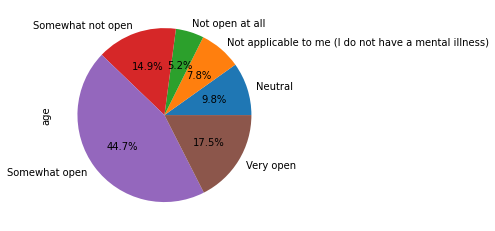

In [ ]:
# 2016
data_2016 = cd[cd['year'] == 2016]
data = data_2016.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%")

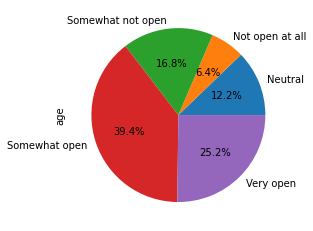

In [ ]:
# 2017
data_2017 = cd[cd['year'] == 2017]
data = data_2017.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%")

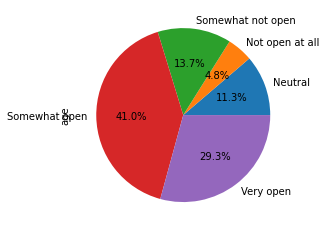

In [ ]:
# 2018
data_2018 = cd[cd['year'] == 2018]
data = data_2018.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%")

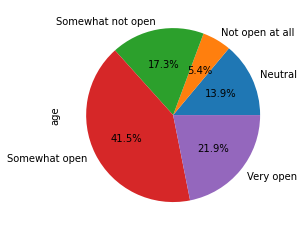

In [ ]:
# 2019
data_2019 = cd[cd['year'] == 2019]
data = data_2019.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%")

In [ ]:
#a

## Hypothesis Testing

In [ ]:
#a